In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

filepath = 'C:/Repositories/Udacity_Best_In_Show/best_in_show.csv'
df = pd.read_csv(filepath)

In [128]:
def ConvertDfObjectsToNumeric(df, column_names_array):
    '''
    INPUT
    df - the pandas dataframe to be changed
    column_names_array - the column headings that are to be converted from object to float
    
    OUTPUT
    None
    '''
    # Convert remaning object types to floats
    for name in column_names_array:
        
        df[name] = pd.to_numeric(df[name], errors= 'coerce')


In [129]:
def CleanData(df):
    '''
    INPUT
    df - the pandas dataframe to be cleaned
    
    OUTPUT
    X - All of the variables you want to consider when predicting the response (matrix)
    y - The response variable (matrix)
    '''
    # Replace the 'no data' labels with NaNs
    df = df.replace('no data', np.nan)

    # Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    # Remove missing intelligence and popularity nan rows
    df = df.dropna(subset = ['1 INTELLIGENCE (TRAINABILITY) ranking', 'POPULARITY IN US', 'intelligence category'])

    # Select the columns of interest
    new_df = df[['1 INTELLIGENCE (TRAINABILITY) ranking', 'POPULARITY IN US', 'LIFETIME COST, $', 
    '5b suitability for children ', '2 LONGEVITY', '5a grooming required ', '4a average purchase price, US$', 
    'category', 'intelligence category']]

    # For quantitative variables, replace NaN values with the mean of that column
    quantitativeVariables = new_df.select_dtypes(include=['float', 'int']).columns
    for column in quantitativeVariables:
        new_df[column].fillna((new_df[column].mean()), inplace=True)
    
    return new_df

In [ ]:
def CreateDummyDf(df, categorical_columns, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to get dummy variablesf for
    categorical_columns - the names of the categorical columns (list of strings)
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe with only the dummy variable columns
    '''
    for column in  categorical_columns:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(column, axis=1), pd.get_dummies(df[column], prefix=column, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [130]:
# Remove '$' from columns and convert '-' to nan
df[df.columns[1:]] = df[df.columns[1:]].replace('[\$,]', '', regex=True)
df[df.columns[1:]] = df[df.columns[1:]].replace('-', np.nan, regex=True)

In [131]:
# Convert the object type data to floats
columnNames = ['1 INTELLIGENCE (TRAINABILITY) ranking', 'POPULARITY IN US', 'LIFETIME COST, $', '2 LONGEVITY', '4a average purchase price, US$']
ConvertDfObjectsToNumeric(df, columnNames)

In [132]:
# Create cleaned dataset for quantitative variables
cleaned_df = CleanData(df)

# Check to make sure only categorical data have nan values
print("Percentage of missing values:")
print(cleaned_df.isna().sum()/len(cleaned_df))


Percentage of missing values:
1 INTELLIGENCE (TRAINABILITY) ranking    0.000000
POPULARITY IN US                         0.000000
LIFETIME COST, $                         0.000000
5b suitability for children              0.242424
2 LONGEVITY                              0.000000
5a grooming required                     0.242424
4a average purchase price, US$           0.000000
category                                 0.106061
intelligence category                    0.000000
dtype: float64


c:\Users\MALIK\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


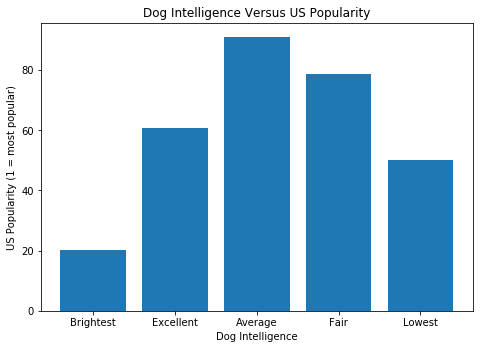

Brightest
Ttest_indResult(statistic=-2.971657907983322, pvalue=0.005901425317252588)
Ttest_indResult(statistic=-4.1194539662860565, pvalue=0.00015266029401949307)
Ttest_indResult(statistic=-3.735003666434757, pvalue=0.0007866046264631722)
Ttest_indResult(statistic=-2.3338426218629618, pvalue=0.030739117249612827)
Excellent
Ttest_indResult(statistic=-2.2971765064958993, pvalue=0.02523685092872833)
Ttest_indResult(statistic=-1.3498781447310584, pvalue=0.1844610128861497)
Ttest_indResult(statistic=0.7175142671930435, pvalue=0.4786070454017354)


In [133]:
# Question Number 1: Are smart dogs popular in the US?
# To answer this question I created a subsection of the dataframe for each different intelligence level. The average popularity score
# for each intelligence level was then plotted so that each of the categories could easily be compared. A ttest was run comparing
# each of the groups to check for statistically significant differences.

# Create sub df for Brightest, Excellent, Average, Fair, and Lowest intelligence levels
excellentPopularity = cleaned_df[cleaned_df['intelligence category'] == 'Excellent'][['POPULARITY IN US', 'LIFETIME COST, $']]
brightestPopularity = cleaned_df[cleaned_df['intelligence category'] == 'Brightest'][['POPULARITY IN US', 'LIFETIME COST, $']]
averagePopularity = cleaned_df[cleaned_df['intelligence category'] == 'Average'][['POPULARITY IN US', 'LIFETIME COST, $']]
fairPopularity = cleaned_df[cleaned_df['intelligence category'] == 'Fair'][['POPULARITY IN US', 'LIFETIME COST, $']]
lowestPopularity = cleaned_df[cleaned_df['intelligence category'] == 'Lowest'][['POPULARITY IN US', 'LIFETIME COST, $']]

# Plot the average popularity (1 = most popular) against dog intelligence
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
intelligence = ['Brightest', 'Excellent', 'Average', 'Fair', 'Lowest']
popularity = [
    brightestPopularity['POPULARITY IN US'].mean(),
    excellentPopularity['POPULARITY IN US'].mean(),
    averagePopularity['POPULARITY IN US'].mean(),
    fairPopularity['POPULARITY IN US'].mean(),
    lowestPopularity['POPULARITY IN US'].mean()]

ax.bar(intelligence,popularity)
ax.set_title('Dog Intelligence Versus US Popularity')
ax.set_ylabel('US Popularity (1 = most popular)')
ax.set_xlabel('Dog Intelligence')
plt.show()

# Check for statistical significance between the top two intelligent groups
print('Brightest')
print(ttest_ind(brightestPopularity['POPULARITY IN US'], excellentPopularity['POPULARITY IN US']))
print(ttest_ind(brightestPopularity['POPULARITY IN US'], averagePopularity['POPULARITY IN US']))
print(ttest_ind(brightestPopularity['POPULARITY IN US'], fairPopularity['POPULARITY IN US']))
print(ttest_ind(brightestPopularity['POPULARITY IN US'], lowestPopularity['POPULARITY IN US']))
print('Excellent')
print(ttest_ind(excellentPopularity['POPULARITY IN US'], averagePopularity['POPULARITY IN US']))
print(ttest_ind(excellentPopularity['POPULARITY IN US'], fairPopularity['POPULARITY IN US']))
print(ttest_ind(excellentPopularity['POPULARITY IN US'], lowestPopularity['POPULARITY IN US']))

True


Text(0.5, 1.0, 'Dog Popularity as a Function of Cost')

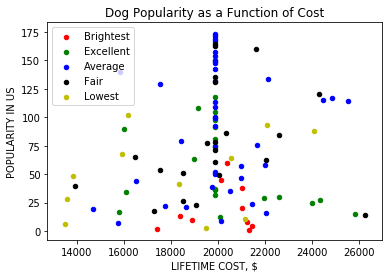

In [134]:
# Question Number 2: Are more intelligent dogs more cost effective? This question starts to dive into why the Brightest dogs
# are so popular with there being no difference between the lowest intelligent and next smartest dogs. Here, a scatter plot will 
# used to visualize trends between dog intelligence levels, lifetime cost, and popularity in the US.

ax1 = brightestPopularity.plot(kind='scatter', y='POPULARITY IN US', x='LIFETIME COST, $', color='r')
ax2 = excellentPopularity.plot(kind='scatter', y='POPULARITY IN US', x='LIFETIME COST, $', color='g', ax=ax1)    
ax3 = averagePopularity.plot(kind='scatter', y='POPULARITY IN US', x='LIFETIME COST, $', color='b', ax=ax1)
ax4 = fairPopularity.plot(kind='scatter', y='POPULARITY IN US', x='LIFETIME COST, $', color='k', ax=ax1)    
ax5 = lowestPopularity.plot(kind='scatter', y='POPULARITY IN US', x='LIFETIME COST, $', color='y', ax=ax1)

print(ax1 == ax2 == ax3 == ax4 == ax5)  # True
plt.legend(['Brightest','Excellent','Average', 'Fair', 'Lowest'])
plt.title('Dog Popularity as a Function of Cost')

In [135]:
# Question Number 3: What key features and parameters do most of the Brightest dogs have? Here, I created a 
# linear regression model.... Using the correlation coefficients we are able to assess what the key contributing
# parameters are.
#  correlation coefficient plot?




In [200]:
# Convert response variable to binary values. We only care about the Brightest intelligence level and so it has been assigned 1 and the other categories a 0.
cleaned_df['intelligence category'] = cleaned_df['intelligence category'].replace(['Excellent','Above average','Average','Fair', 'Lowest'],0,regex=True)
cleaned_df['intelligence category'] = cleaned_df['intelligence category'].replace(['Brightest'],1,regex=True)

# Clean the data for the categorical NaNs (drop missing values for children suitability)
cleaned_df = cleaned_df.dropna(subset = ['5b suitability for children '])

# Create dummy values for 'category'
columnList = ['category']
cleaned_df = CreateDummyDf(cleaned_df, columnList, True)

# Specify predictor variable column names
columnPredictorList =  ['5b suitability for children ','5a grooming required '
, '2 LONGEVITY','category_hound', 'category_sporting', 'category_terrier',
'category_toy', 'category_working']

In [212]:
# Begin setting up the logistic regression

# Set x and y
x = cleaned_df[columnPredictorList]
y = cleaned_df['intelligence category']

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, 
test_size = 0.2, random_state=13)
logreg = LogisticRegression(solver='lbfgs')

# Predict and score the model
predicted = cross_val_predict(logreg, X_train, y_train, cv=10)
print(accuracy_score(y_train, predicted))

clf = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(clf.coef_, clf.intercept_)
print(columnPredictorList)


0.8875
0.9
[[ 0.87892993  0.6408042   0.14948652 -0.70875447  0.28048162 -0.67046567
  -0.35980131  0.40852296]] [-6.4578477]
['5b suitability for children ', '5a grooming required ', '2 LONGEVITY', 'category_hound', 'category_sporting', 'category_terrier', 'category_toy', 'category_working']


c:\Users\MALIK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
